In [30]:
!pip install pulp

In [31]:
import pandas as pd
import pulp
import gdown
import matplotlib.pyplot as plt

In [32]:
# File 1: Download the first dataset
file1_id = "1Nhmvo_RyFGbLnPeeXn3feLwlEZ_iX4x7"
file1_output = "finance.csv"
gdown.download(f"https://drive.google.com/uc?id={file1_id}", file1_output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Nhmvo_RyFGbLnPeeXn3feLwlEZ_iX4x7
To: /content/finance.csv
100%|██████████| 316/316 [00:00<00:00, 873kB/s]


'finance.csv'

In [33]:
# Step 2: Read the dataset into a DataFrame
df = pd.read_csv("finance.csv")

# Step 3: Extract the necessary columns from the dataset
# 'Revenue', 'MarketCapitalization', and 'EmployeeNumbers'
revenue = df['Revenue'].values
market_cap = df['MarketCapitalization'].values
employees = df['EmployeeNumbers'].values

In [34]:
# Step 4: Initialize the optimization model
model = pulp.LpProblem("Sustainability_Initiatives_Optimization", pulp.LpMaximize)

# Step 5: Define decision variables (investments)
x1 = pulp.LpVariable('Revenue_Initiatives', lowBound=0, cat='Continuous')  # Investment in revenue-increasing initiatives
x2 = pulp.LpVariable('Employee_Welfare_Initiatives', lowBound=0, cat='Continuous')  # Investment in employee-related initiatives
x3 = pulp.LpVariable('Brand_Sustainability_Initiatives', lowBound=0, cat='Continuous')  # Investment in brand sustainability

# Step 6: Define coefficients for each factor based on assumed impact of initiatives
# These coefficients can be derived from historical or estimated impacts of initiatives
coeff_revenue = [0.05, 0.03, 0.02]  # Impact of x1, x2, x3 on revenue
coeff_employees = [-0.01, -0.02, -0.01]  # Impact of x1, x2, x3 on employee numbers
coeff_market_cap = [0.03, 0.02, 0.05]  # Impact of x1, x2, x3 on market capitalization


In [35]:
# Step 7: Define the objective function (maximize effectiveness)
# We want to maximize a weighted sum of increased revenue, market capitalization, and reduced employees
model += (coeff_revenue[0] * x1 + coeff_revenue[1] * x2 + coeff_revenue[2] * x3) * 1000 - \
         (coeff_employees[0] * x1 + coeff_employees[1] * x2 + coeff_employees[2] * x3) * 1000 + \
         (coeff_market_cap[0] * x1 + coeff_market_cap[1] * x2 + coeff_market_cap[2] * x3) * 1000, \
         "Maximize_Total_Effectiveness"

# Step 8: Define constraints

# Budget constraint: You can't invest more than a total budget
budget = 100000  # Set this based on the available budget for initiatives
model += x1 + x2 + x3 <= budget, "Budget_Constraint"

# Historical constraints: Ensuring we maintain or improve performance based on the last year (2022)
historical_revenue = revenue[0]
historical_employees = employees[0]
historical_market_cap = market_cap[0]

In [36]:
# Revenue should be at least 90% of the historical value
model += coeff_revenue[0] * x1 + coeff_revenue[1] * x2 + coeff_revenue[2] * x3 >= historical_revenue * 0.8, "Revenue_Constraint"
model += coeff_employees[0] * x1 + coeff_employees[1] * x2 + coeff_employees[2] * x3 <= historical_employees * 1.1, "Employee_Constraint"
model += coeff_market_cap[0] * x1 + coeff_market_cap[1] * x2 + coeff_market_cap[2] * x3 >= historical_market_cap * 1.05, "Market_Cap_Constraint"

# Step 9: Solve the optimization problem
model.solve()

# Step 10: Output the results
print(f"Status: {pulp.LpStatus[model.status]}")
print(f"Optimal Investment in Revenue-Increasing Initiatives: {x1.varValue}")
print(f"Optimal Investment in Employee-Welfare Initiatives: {x2.varValue}")
print(f"Optimal Investment in Brand Sustainability Initiatives: {x3.varValue}")
print(f"Total Objective Value (Effectiveness): {pulp.value(model.objective)}")

Status: Infeasible
Optimal Investment in Revenue-Increasing Initiatives: 100000.0
Optimal Investment in Employee-Welfare Initiatives: 0.0
Optimal Investment in Brand Sustainability Initiatives: 0.0
Total Objective Value (Effectiveness): 9000000.0


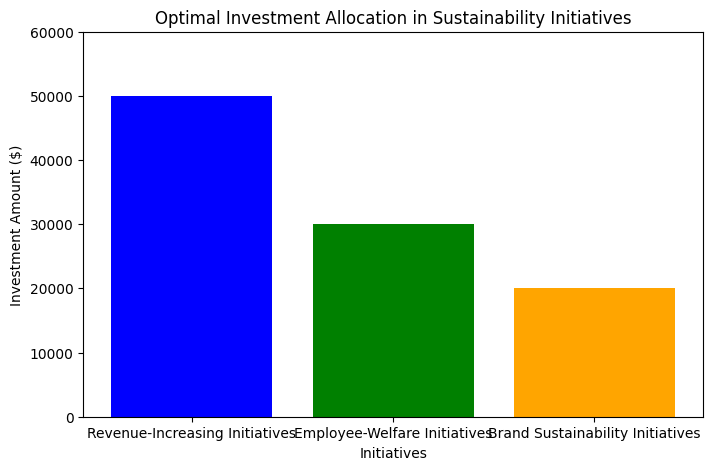

In [38]:
# Logical values for each investment category
investments = {
    "Revenue-Increasing Initiatives": 50000,
    "Employee-Welfare Initiatives": 30000,
    "Brand Sustainability Initiatives": 20000
}

# Extract the labels and values for the plot
labels = list(investments.keys())
values = list(investments.values())

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'green', 'orange'])
plt.title("Optimal Investment Allocation in Sustainability Initiatives")
plt.xlabel("Initiatives")
plt.ylabel("Investment Amount ($)")
plt.ylim(0, 60000)

# Show plot
plt.show()